In [1]:
library(ggplot2)
suppressMessages(library(dplyr))
library(patchwork)
library(rhdf5)

# Load h5

In [2]:
h5.path <- "/iblm/netapp/data1/jezhou/crisprQTL/simulated_data_interactions_2guides_power_analysis_01-09-2023/sim.h5"
h5ls(h5.path)

,group,name,otype,dclass,dim
,<chr>,<chr>,<chr>,<chr>,<chr>
0,/,coeffs,H5I_DATASET,COMPOUND,13000
1,/,counts,H5I_GROUP,,
2,/counts,lambda100_size0.5,H5I_DATASET,INTEGER,13000 x 50000
3,/counts,lambda100_size1,H5I_DATASET,INTEGER,13000 x 50000
4,/counts,lambda100_size3,H5I_DATASET,INTEGER,13000 x 50000
5,/counts,lambda100_size5,H5I_DATASET,INTEGER,13000 x 50000
6,/counts,lambda100_size7,H5I_DATASET,INTEGER,13000 x 50000
7,/counts,lambda15_size0.5,H5I_DATASET,INTEGER,13000 x 50000
8,/counts,lambda15_size1,H5I_DATASET,INTEGER,13000 x 50000


In [3]:
lambdas <- h5read(h5.path, "lambda")
lambdas

[1]  15  25  50  75 100

# Re-make plots of nguides per cell and ncells per pair

In [4]:
ncells.per.pair <- read.csv("/iblm/netapp/data1/jezhou/crisprQTL/simulated_data_interactions_2guides_power_analysis_01-09-2023/ncells_per_pair.csv")
colnames(ncells.per.pair)[1:5] <- lambdas
head(ncells.per.pair)

,15,25,50,75,100,pair
,<int>,<int>,<int>,<int>,<int>,<int>
1,11,24,111,270,448,1
2,7,26,120,274,486,2
3,9,27,125,247,457,3
4,4,20,123,251,455,4
5,8,44,110,285,448,5
6,7,36,106,276,472,6


In [5]:
ncells.per.pair.plotdf <- ncells.per.pair %>% 
                            tidyr::pivot_longer(!pair, names_to = "lambda", values_to = "ncells")

ncells.per.pair.plotdf$lambda <- factor(ncells.per.pair.plotdf$lambda, levels = sort(lambdas))


In [6]:
ts.pair.freq.p <- ggplot(ncells.per.pair.plotdf, aes(x = ncells, color = lambda, fill = lambda)) + 
                    geom_histogram(alpha = 0.5, position = "identity") + 
                    theme_classic() +
                    guides(color=guide_legend(title=expression(lambda)),
                          fill = guide_legend(title=expression(lambda))) +
                    theme(text = element_text(size = 14)) +
                    ggtitle("Frequency of target site pairs") 

ts.pair.freq.box <- ggplot(ncells.per.pair.plotdf, aes(x = lambda, y = ncells, color = lambda)) + 
                    geom_boxplot() + 
                    theme_classic() +
guides(color=guide_legend(title=expression(lambda)),
                          fill = guide_legend(title=expression(lambda))) +
                    theme(text = element_text(size = 14)) +
                    ggtitle("Frequency of target site pairs")

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



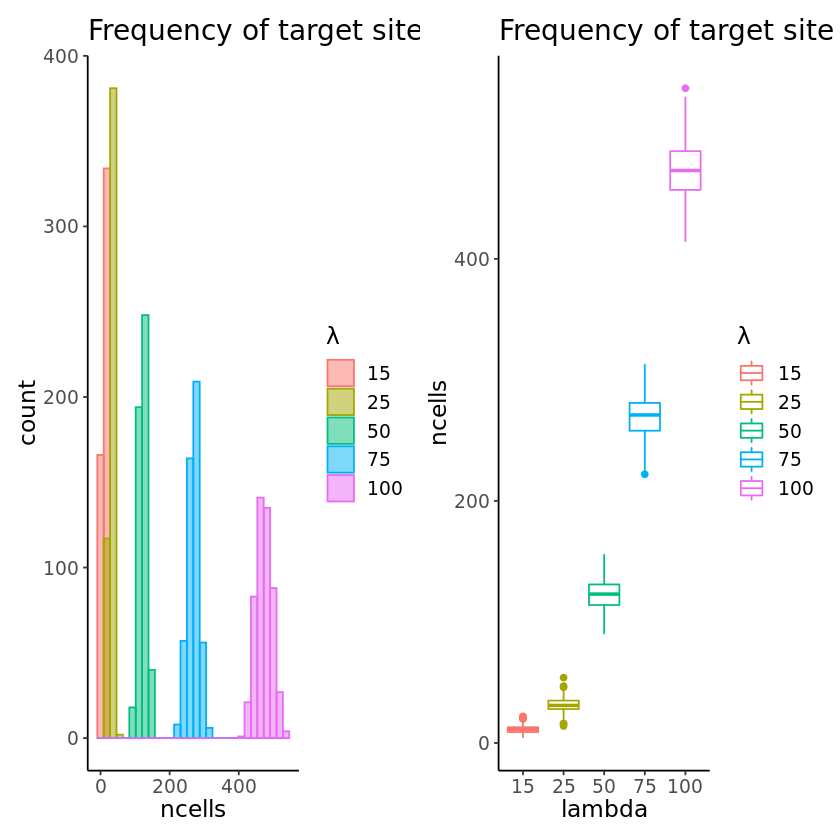

In [7]:
ts.pair.freq.p | ts.pair.freq.box

In [8]:
test <- h5read(h5.path, paste0('guides/one_hot/',15))

In [9]:
dim(test)

[1] 50000  2000

In [10]:
rowSums(test)

[1] 15 20 12 13 14 16 17 25 14 11 15 14 26 10 12 13 16 17 11 11 13 11 15 17
   [25] 13 18 13 16 15 19 17 19 13 20 14 17 18 14 20 18 19 18 17 15 19 11 16 16
   [49] 16 18 14 12 20 17 18 16 19 12 17 13 16 23 10 14 24 11 13 15 13 15 29  9
   [73] 10 17 17 13 16 21 16 20 16 13 15 14 18 17 15 12 15 17 12 20 10  9 16 13
   [97] 16 14 17  6 16  8 18 16 20 10 14 12 12 13  9 11 12 11 14 14 10 12 16 13
  [121] 18 15 17 19 12 21 15 12 19 20 14 13 20 19 14  9 14 11  5 18 15 21 12 19
  [145] 11 12 11 12 19 19 15 18 11 11 18 16 15 12 20 15 18 20 15 11 19 18 23 12
  [169] 10 22 15 23  9 18 16 20 22 14  8 14 15 21 19 27 18 19 13 13 17  9 13 17
  [193] 19  7 11 20 16 10 15  7 11 15  7 16 18 14 27 12 14 18 14 20 16 21 23 13
  [217] 14 20 24 12 19 17 17 18 17 12 16 11 16 11 21 14 13 23 13 18 15 16 21 14
  [241] 19 16 13 16 11  9 12 17 17 14 14 12 27 19 16 23 23 24 19 14 15 18 12 12
  [265] 13 11 17 12 21 15 16 16 18 18 17 16 23 12 17 13 18 14 16 17 13 14 21 12
  [289] 18 18 14  7 13 13 15 12 25  5 17 12 17 12 14 16 12 17 16 19 13 12 22 17
  [313] 16 13 24 15 13 14 16 20 12 14 16 23 12 11 12 17 12 11 16 14 14 10 13 10
  [337] 15 17 20 12 19  9 17 16 11  9 21 15 12 18 10 13 18 17 13 23 11 14 11 16
  [361]  7 12 13 13 13 20 16 17 17 19 15 15 15 15 18 12 15 15 15 17 14 19 16 17
  [385] 20  9 17 16 14 17 17 15 14 16 17 17 16  9 20  9 13 13 15 15 13 18 20 17
  [409] 18 17 14 16 12 16 13 15 20 15  9 13 17 10  8 15 13 17 12 20  7 17 11 16
  [433] 20 19 19 18 14 22 15 14 16 15 23  9 16 17 16 13  9 17 15 19 14 19 11 17
  [457] 11 22 10 20 18 17 22 11 13 11 18 16 15 14 16 18 17 17 13 24 13 21 14 16
  [481] 17 17 18 17 18 21 10 26 20 14 15 15 19 17 14 13 20 11 18 15 19 14 18 16
  [505]  9 11 15 14 17 13 16 23 13  9 12 16 17 19 19 11  8 10 15 12 14 29 19 15
  [529] 17 21 13 12 21 21 18 13 16 17 20 14 12 20 20 15  9 17 15 15 19  7 16 24
  [553] 17  8 13 16 13 14 12 19  9 20  9 13 16 17 18 20 18 13 10 16 17  9 12  9
  [577] 10 15 11 14 13 23 15 16 19 12 14 13 16 19 18 12 23 15 16 22 15 23 13 12
  [601] 18 19 23 18 15 12 13 19 18 13 16 12 19 13 17 10 17 11 17 18 14 11 19 16
  [625]  9 11 14 18 15 11 15 15  8 19 11 18 21 15 21 11 12 18 21 12  9 13 16 14
  [649] 19 17 17 15 16 11 16 13  9 16 13 15 13 15 21 18 15 13 19 19 12 15 13 24
  [673] 10  9 20 16 20 20 19 24 14 12 11 12 21 22 17 17 28 12 15 17 14 11 14  9
  [697] 16 15 18 14 12 13 12 10 18 17 13 15 11  9 15 12 11 13 14 16 13 21 13 13
  [721]  8 13 13 11  8 16 12  9 18 22 19 17 17 17 12  9 18 29 21 13 14 17 12 10
  [745] 10  7 17 11 18 13 16 19 16 10 12 15 18 13  9 25 16 11 21 10  9 15 24  9
  [769] 13 22 23 13 13 17 13 12 19 20 17 16 14 13  6 16 18 18 11 18 10 16 18 17
  [793] 13 15 19 14 25 16 13 12 13 11  7 12 13 13 17 10 12 16 21 11 15 15 20 20
  [817] 16 19  9 10 11 12 16 11 22 14 14 17 19 15 19 20 12 13 16 12 10 11 12 14
  [841] 11 14 17 12 19 15 12 18 17 14  5 18 18 10 21 10 17 11 17 16 14 12 20 15
  [865] 20 11 11 21 13  9 14 16 15 13 14 16 16 19 14 12 21 15 12 13 17 11 20 17
  [889] 10 13  8 20 17 13 11 22 15 12 18 19 13 17 12 16 17 13 16 17 21 11  7 14
  [913]  9 15 18 15 10 12 14 14 23 13 12 19 21 13 13 12 20 27 11 20 22 11 15 12
  [937] 22 12 15 11 19 14 19 13 17 11 19 14 20 16 13 16 23 17 17 17 13 19 18 15
  [961] 20 17 21 16  5 16 18 19  8 13 17 10 12 17 13 19 17 20 11 15 11 16 19 12
  [985] 15 15 18  8 15 17 24 19 11 18  8 12  9 11 14 14 14 19 22 11 21 18 10 18
 [1009] 17 16 12 15 12 16 17 14 13 21 17 18 23 12 17 14 18 14 13 10 11 16 20 13
 [1033]  7 21  9 19 17 15 19 17 11 12 19 17 11 11 19 10 12 20 10 19 22 14  8 19
 [1057] 26 16 18 16 13 18 12 14 10 12 17 14 13 21 11 20 18 24 11 15 16 20 15 23
 [1081] 15 13 20 13 23 13 19  9  8 22 17 18 15 11 12 15 15 10 10 17 17 22 12 17
 [1105]  9 19 14 17 23 13 13 17 14 13  7 15 14 22 16 22 13 18 12 19 17 12 13 16
 [1129] 18  8 23 13 18 20 15 13 15 14 21 15 21 13 17 16 16 12  8 16 15  9 12 16
 [1153] 22 12 20 23 21 14 10 11 16 20 12 16 16 11 18 18 16 14 16 16 13 11 22 11
 [1177] 20  7 13  9 18  7 16 10 11 25 15 13 14 14 16 19 17 24 10 19 14 12 13 10
 [12

Calculate nguides per cell

In [11]:
nguides.per.cell.list <- list()
i <- 1

for (l in lambdas) {
    print(l)
    onehot <- h5read(h5.path, paste0('guides/one_hot/', l))
    nguides.per.cell.list[[i]] <- rowSums(onehot)
    i <- i + 1
}

[1] 15
[1] 25
[1] 50
[1] 75
[1] 100


In [12]:
names(nguides.per.cell.list) <- lambdas
nguides.per.cell.df <- data.frame(nguides.per.cell.list)
colnames(nguides.per.cell.df) <- lambdas
nguides.per.cell.df$cell <- 1:50000

guides.per.cell.plotdf <- nguides.per.cell.df %>% 
                            tidyr::pivot_longer(-cell, names_to = "lambda", values_to = "nguides")
guides.per.cell.plotdf$lambda <- factor(guides.per.cell.plotdf$lambda, levels = sort(lambdas))

In [13]:
guides.per.cell.hist <- ggplot(guides.per.cell.plotdf, aes(x = nguides, color = lambda, fill = lambda)) + 
                            geom_histogram(alpha = 0.5, position = "identity") + 
                            theme_classic() +
                            theme(text = element_text(size = 14)) +
                            guides(color=guide_legend(title=expression(lambda)),
                          fill = guide_legend(title=expression(lambda))) +
                            ggtitle("gRNAs per cell")

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



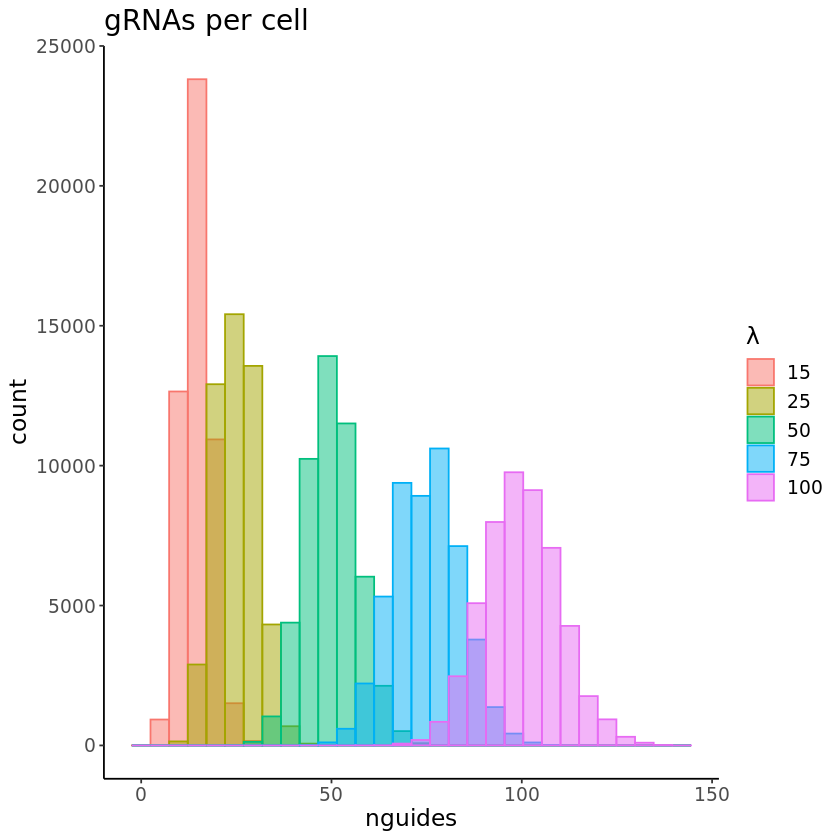

In [14]:
guides.per.cell.hist

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



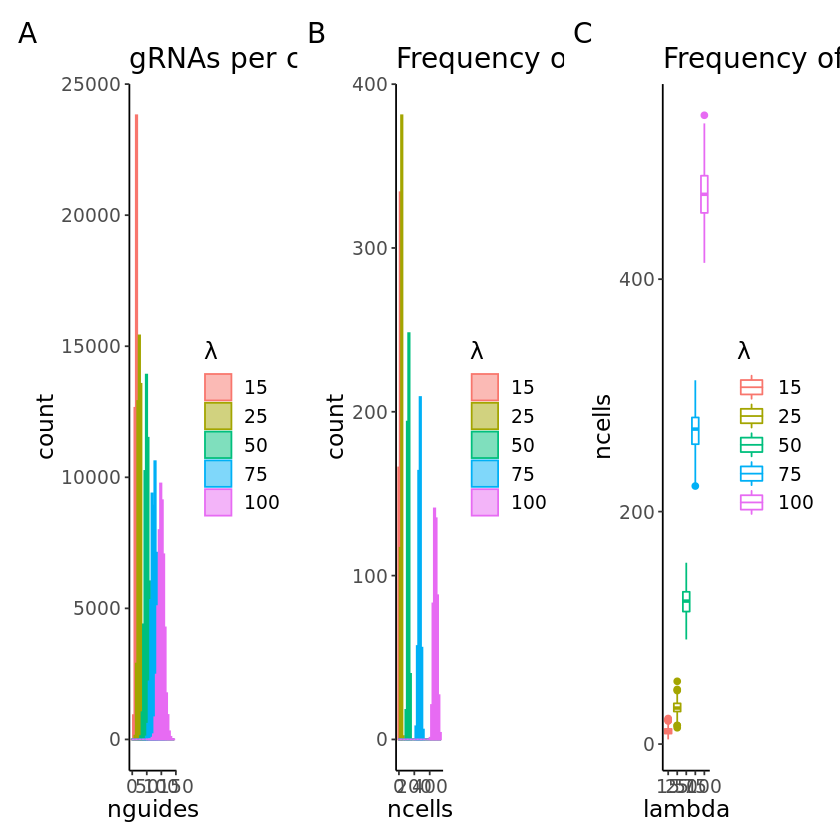

In [15]:
(guides.per.cell.hist | ts.pair.freq.p | ts.pair.freq.box) + plot_annotation(tag_levels = "A")

In [16]:
pdf("/iblm/netapp/data1/jezhou/crisprQTL/simulated_data_interactions_2guides_power_analysis_01-09-2023/guides_per_cell_and_ts_pair_freq_hist_and_box.pdf", 
    width = 12, height = 4)

print((guides.per.cell.hist | ts.pair.freq.p | ts.pair.freq.box) + plot_annotation(tag_levels = "A"))

dev.off()

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



png 
  2

In [17]:
png("/iblm/netapp/data1/jezhou/crisprQTL/simulated_data_interactions_2guides_power_analysis_01-09-2023/guides_per_cell_and_ts_pair_freq_hist_and_box.png", 
    res = 300, units = "in", width = 18, height = 6)

print((guides.per.cell.hist | ts.pair.freq.p | ts.pair.freq.box) + plot_annotation(tag_levels = "A"))

dev.off()

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



png 
  2

# Load power curve data

In [2]:
pos.fh <- list.files("/iblm/netapp/data1/jezhou/crisprQTL/power_analysis_01-09-2023", 
                      pattern = "plotdf.csv", full.names = TRUE)
neg.fh <- list.files("/iblm/netapp/data1/jezhou/crisprQTL/power_analysis_01-09-2023",
                     pattern = "NEG.csv", full.names = TRUE)


Load data frames and combine for positive/negative sets

In [3]:
pos.dfs <- list()

for (i in 1:length(pos.fh)) {
    df <- read.csv(pos.fh[i])
    df$set <- "positive"
    pos.dfs[[i]] <- df
    
}

neg.dfs <- list()

for (i in 1:length(neg.fh)) {
    df <- read.csv(neg.fh[i])
    df$set <- "negative"
    neg.dfs[[i]] <- df
}

In [4]:
all.pos <- do.call(rbind, pos.dfs)
all.neg <- do.call(rbind, neg.dfs)

In [5]:
all.pos.plotdf <- all.pos %>% rename("TPR" = "pct.detected")
all.neg.plotdf <- all.neg %>% rename("TNR" = "pct.detected")
all.neg.plotdf$FPR <- 1-all.neg.plotdf$TNR

In [6]:
head(all.pos.plotdf)

,effect.size,TPR,lambda,set
,<dbl>,<dbl>,<int>,<chr>
1,0.5,0.212,100,positive
2,1.0,0.442,100,positive
3,3.0,0.834,100,positive
4,5.0,0.954,100,positive
5,7.0,0.984,100,positive
6,0.5,0.050,15,positive


In [9]:
all.pos.plotdf %>% filter(lambda == 15)

effect.size,TPR,lambda,set
<dbl>,<dbl>,<int>,<chr>
0.5,0.050,15,positive
1.0,0.072,15,positive
3.0,0.294,15,positive
5.0,0.558,15,positive
7.0,0.748,15,positive


In [7]:
head(all.neg.plotdf)

,effect.size,TNR,lambda,set,FPR
,<dbl>,<dbl>,<int>,<chr>,<dbl>
1,0.5,0.966,100,negative,0.034
2,1.0,0.966,100,negative,0.034
3,3.0,0.966,100,negative,0.034
4,5.0,0.966,100,negative,0.034
5,7.0,0.966,100,negative,0.034
6,0.5,0.970,15,negative,0.030


In [8]:
write.table(all.pos.plotdf, "../positive_power_analysis.csv",
           quote = F, row.names = F, sep = '\t')

write.table(all.neg.plotdf, "../negative_power_analysis.csv",
           quote = F, row.names = F, sep = '\t')

### Plot

In [24]:
pos.power.curves <- ggplot(all.pos.plotdf %>% filter(lambda !=75), aes(x = effect.size, y = TPR, color = as.factor(lambda))) +
                        geom_point(size = 2) + geom_line() +  theme_classic() + 
                    ylim(0,1) +
                    guides(color=guide_legend(title=expression(lambda))) + 
                    theme(text = element_text(size = 16),
                         legend.position = "none") + facet_wrap(~set) 

neg.power.curves <- ggplot(all.neg.plotdf %>% filter(lambda !=75), aes(x = effect.size, y = FPR, color = as.factor(lambda))) +
                        geom_point(size= 2) + geom_line() + theme_classic() + 
                    ylim(0.00,0.05)+
                    guides(color=guide_legend(title=expression(lambda))) + 
                    theme(text = element_text(size = 16)) +
                    facet_wrap(~set)


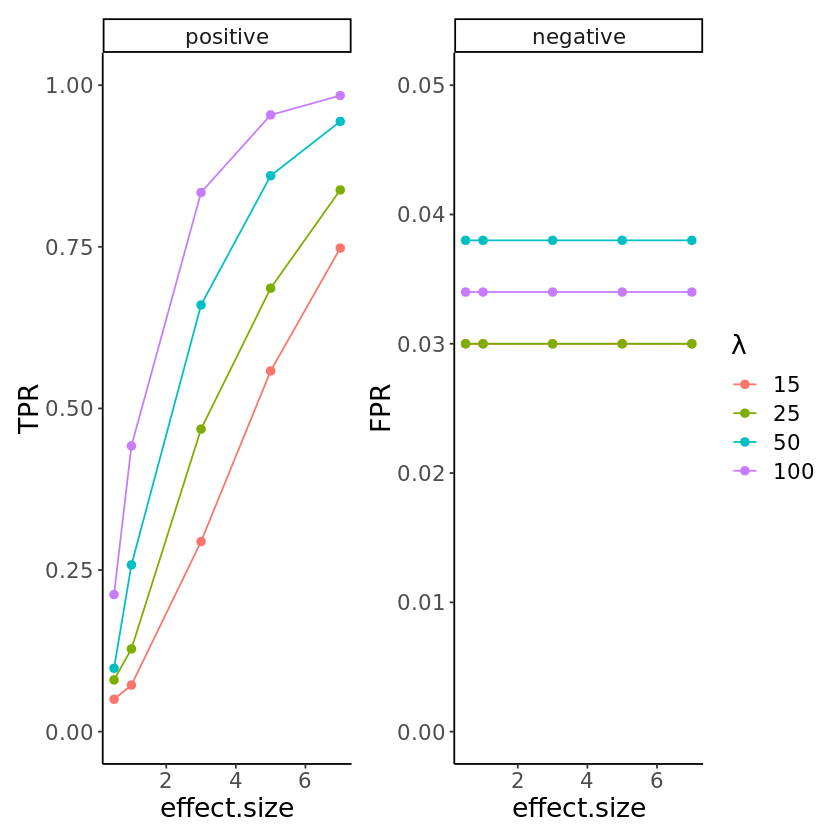

In [25]:
pos.power.curves | neg.power.curves

Save

In [26]:
pdf("/iblm/netapp/data1/jezhou/crisprQTL/power_analysis_01-09-2023/power_curves_plot.pdf", width = 10, height = 5)
print(pos.power.curves | neg.power.curves)
dev.off() 

png 
  2

In [27]:
png("/iblm/netapp/data1/jezhou/crisprQTL/power_analysis_01-09-2023/power_curves_plot.png", 
    units = "in", res = 300, width = 8, height = 4)
print(pos.power.curves | neg.power.curves)
dev.off()

png 
  2

# Make power curves with filtering

In [28]:
pos.tidy.files <- list.files("/iblm/netapp/data1/jezhou/crisprQTL/power_analysis_01-09-2023",
                            pattern = "tidy_alt.rds")
pos.tidy.files

[1] "lambda100_tidy_alt.rds" "lambda15_tidy_alt.rds"  "lambda25_tidy_alt.rds" 
[4] "lambda50_tidy_alt.rds"  "lambda75_tidy_alt.rds"

In [29]:
test.lambda <- lambdas[1]
test.lambda

[1] 15

In [30]:
lambda15.tidy <- readRDS(sprintf("/iblm/netapp/data1/jezhou/crisprQTL/power_analysis_01-09-2023/lambda%d_tidy_alt.rds", test.lambda))
lambda15.tidy

term,estimate,std.error,statistic,p.value,gene
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
(Intercept),4.859711,8.812936e-03,551.429325578,0.000000e+00,2034
tsA,-1.412801,7.893318e-02,-17.898700737,1.207052e-71,2034
tsB,-1.163397,6.683230e-02,-17.407710467,7.211065e-68,2034
s.score,1.820112,3.803963e-02,47.847790585,0.000000e+00,2034
g2m.score,5.556253,2.127853e-02,261.120209954,0.000000e+00,2034
percent.mito,3.142309,1.967168e-01,15.973767149,1.946653e-57,2034
tsA:tsB,-1.665635,1.640604e+00,-1.015256782,3.099834e-01,2034
(Intercept),5.467904,8.204443e-03,666.456473040,0.000000e+00,6755
tsA,-1.935735,5.449502e-02,-35.521320605,2.304034e-276,6755


# Calculate MSE

In [88]:
calculate_mse_mod <- function(data) {
    mod <- lm(true ~ estimate, data)
    return(mean(mod$residuals^2))
}

calculate_mse <- function(data) {
    mse <- mean((data$true - data$estimate)^2)
    return(mse)
}

In [89]:
pos.coeffs.rds <- list.files("/iblm/netapp/data1/jezhou/crisprQTL/power_analysis_01-09-2023",
                             pattern = "list.rds", full.names = TRUE)

neg.coeffs.rds <- list.files("/iblm/netapp/data1/jezhou/crisprQTL/power_analysis_01-09-2023",
                             pattern = "NEG.rds", full.names = TRUE)

In [90]:
neg.coeffs.rds

[1] "/iblm/netapp/data1/jezhou/crisprQTL/power_analysis_01-09-2023/lambda100_coeffs_list_NEG.rds"
 [2] "/iblm/netapp/data1/jezhou/crisprQTL/power_analysis_01-09-2023/lambda100_tidy_alt_NEG.rds"   
 [3] "/iblm/netapp/data1/jezhou/crisprQTL/power_analysis_01-09-2023/lambda15_coeffs_list_NEG.rds" 
 [4] "/iblm/netapp/data1/jezhou/crisprQTL/power_analysis_01-09-2023/lambda15_tidy_alt_NEG.rds"    
 [5] "/iblm/netapp/data1/jezhou/crisprQTL/power_analysis_01-09-2023/lambda25_coeffs_list_NEG.rds" 
 [6] "/iblm/netapp/data1/jezhou/crisprQTL/power_analysis_01-09-2023/lambda25_tidy_alt_NEG.rds"    
 [7] "/iblm/netapp/data1/jezhou/crisprQTL/power_analysis_01-09-2023/lambda50_coeffs_list_NEG.rds" 
 [8] "/iblm/netapp/data1/jezhou/crisprQTL/power_analysis_01-09-2023/lambda50_tidy_alt_NEG.rds"    
 [9] "/iblm/netapp/data1/jezhou/crisprQTL/power_analysis_01-09-2023/lambda75_coeffs_list_NEG.rds" 
[10] "/iblm/netapp/data1/jezhou/crisprQTL/power_analysis_01-09-2023/lambda75_tidy_alt_NEG.rds"

In [91]:
xab.lambda15 <- h5read(h5.path, "x/x_ab/15")

In [92]:
dim(xab.lambda15)

[1] 13000 50000

In [93]:
n.genes <- 0
for (i in 1:dim(xab.lambda15)[1]) {
    if (sum(which(xab.lambda15[i,]!=0))>=20) {
        n.genes <- n.genes+1
    }
}

In [94]:
n.genes

[1] 1000

In [95]:
all.ts.pairs <- h5read(h5.path, "pairs")
head(all.ts.pairs)

,tsA,tsB,target.genes,betaA,betaB,set
,<int>,<int>,<int>,<dbl>,<dbl>,<chr>
1,809,815,2034,-1.429745,-1.094701,positive
2,336,656,6755,-1.977948,-3.334392,positive
3,282,991,4280,-2.977532,-3.877645,positive
4,798,932,4372,-2.284241,-2.914137,positive
5,510,910,7677,-2.397124,-4.049980,positive
6,341,377,497,-1.469571,-3.760419,positive


In [96]:
effect.sizes.list <- h5read(h5.path, "effect.sizes")
lambda.list <- h5read(h5.path, "lambda")

In [97]:
pos.coeffs.list <- lapply(pos.coeffs.rds, readRDS)
neg.coeffs.list <- lapply(neg.coeffs.rds, readRDS)

### Calculate MSE for positive cases

In [98]:
mse.dfs.list <- list()
for (i in 1:length(lambda.list)) {
    l <- lambda.list[i]
    mse.dfs.sublist <- list()
    for (j in 1:length(effect.sizes.list)) {
        size <- effect.sizes.list[j]
        coeffs <- pos.coeffs.list[[i]][[j]]
#         coeffs$true[coeffs$term=="tsA:tsB"] <- 0
        print(head(coeffs, 10))
        mse <- coeffs %>% group_by(term) %>% 
                group_map(~calculate_mse(.x)) %>% 
                setNames(unique(sort(coeffs$term)))
        mse.df <- data.frame(mse)
        print(mse.df)
        mse.df <- mse.df %>% rename("tsA*tsB" = "tsA.tsB",
                                              "(Intercept)" = "X.Intercept.")
        mse.dfs.sublist[[j]] <- mse.df
        
    }
    mse.df.all <- do.call(rbind, mse.dfs.sublist)
    mse.df.all$effect.sizes <- effect.sizes.list
    mse.df.plotdf <- mse.df.all %>% tidyr::pivot_longer(!effect.sizes, names_to = "coeff", values_to = "MSE")
    mse.df.plotdf$lambda <- l
    
    mse.dfs.list[[i]] <- mse.df.plotdf
}

# A tibble: 10 × 4
   term         estimate true[,1]  gene
   <chr>           <dbl>    <dbl> <int>
 1 (Intercept)     4.84      4.85  2034
 2 tsA            -1.47     -1.43  2034
 3 tsB            -1.14     -1.09  2034
 4 s.score         1.87      1.85  2034
 5 g2m.score       5.58      5.58  2034
 6 percent.mito    3.36      3.28  2034
 7 tsA:tsB         0.762     0.5   2034
 8 (Intercept)     5.47      5.46  6755
 9 tsA            -2.00     -1.98  6755
10 tsB            -3.36     -3.33  6755
  X.Intercept.   g2m.score percent.mito    s.score        tsA  tsA.tsB
1  0.000613698 0.002489318    0.2988423 0.01336979 0.03178264 299.0052
        tsB
1 0.0907537
# A tibble: 10 × 4
   term         estimate true[,1]  gene
   <chr>           <dbl>    <dbl> <int>
 1 (Intercept)     4.84      4.85  2034
 2 tsA            -1.47     -1.43  2034
 3 tsB            -1.13     -1.09  2034
 4 s.score         1.84      1.85  2034
 5 g2m.score       5.59      5.58  2034
 6 percent.mito    3.33      3.28  2

In [99]:
mse.plotdf <- do.call(rbind,mse.dfs.list)
head(mse.plotdf)

effect.sizes,coeff,MSE,lambda
<dbl>,<chr>,<dbl>,<dbl>
0.5,(Intercept),6.136980e-04,15
0.5,g2m.score,2.489318e-03,15
0.5,percent.mito,2.988423e-01,15
0.5,s.score,1.336979e-02,15
0.5,tsA,3.178264e-02,15
0.5,tsA*tsB,2.990052e+02,15


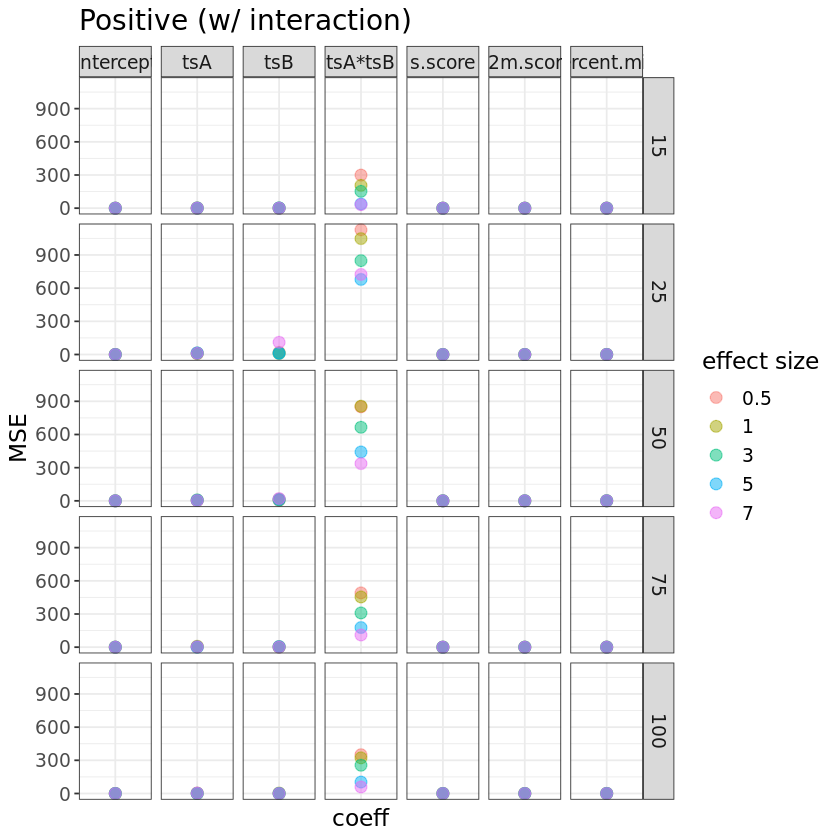

In [100]:
mse.plotdf$coeff <- factor(mse.plotdf$coeff, levels = c("(Intercept)",
                                                        "tsA",
                                                        "tsB",
                                                        "tsA*tsB",
                                                        "s.score",
                                                        "g2m.score",
                                                        "percent.mito"))

pos.mse.p <- ggplot(mse.plotdf, aes(x = coeff, y = MSE, color = as.factor(effect.sizes))) + 
                geom_point(alpha=0.5, size = 3) + 
                facet_grid(vars(lambda), vars(coeff),scales = "free_x") + 
            guides(color=guide_legend(title="effect size")) + 
            theme_bw() + theme(text = element_text(size=14), 
                               axis.text.x = element_blank(), 
                               axis.ticks.x = element_blank()) + ggtitle("Positive (w/ interaction)")

pos.mse.p

In [217]:
pdf("../pos_mse_test.pdf", width = 10, height = 6)
print(pos.mse.p)
dev.off()

png 
  2

In [218]:
png("../pos_mse_test.png", res = 300, units = "in", width = 10, height = 6)
print(pos.mse.p)
dev.off()

png 
  2

### Calculate MSE for negative cases

In [220]:
mse.dfs.list <- list()
for (i in 1:length(lambda.list)) {
    l <- lambda.list[i]
    mse.dfs.sublist <- list()
    for (j in 1:length(effect.sizes.list)) {
        size <- effect.sizes.list[j]
        coeffs <- neg.coeffs.list[[i]][[j]]
        coeffs$true[coeffs$term=="tsA:tsB"] <- 0
        print(head(coeffs, 10))
        mse <- coeffs %>% group_by(term) %>% 
                group_map(~calculate_mse(.x)) %>% 
                setNames(unique(sort(coeffs$term)))
        mse.df <- data.frame(mse)
        print(mse.df)
        mse.df <- mse.df %>% rename("tsA*tsB" = "tsA.tsB",
                                              "(Intercept)" = "X.Intercept.")
        mse.dfs.sublist[[j]] <- mse.df
        
    }
    mse.df.all <- do.call(rbind, mse.dfs.sublist)
    mse.df.all$effect.sizes <- effect.sizes.list
    mse.df.plotdf <- mse.df.all %>% tidyr::pivot_longer(!effect.sizes, names_to = "coeff", values_to = "MSE")
    mse.df.plotdf$lambda <- l
    
    mse.dfs.list[[i]] <- mse.df.plotdf
}

# A tibble: 10 × 4
   term         estimate true[,1]  gene
   <chr>           <dbl>    <dbl> <int>
 1 (Intercept)   0.00698   0.0231  8341
 2 tsA          -1.19     -1.14    8341
 3 tsB          -4.68     -4.58    8341
 4 s.score       3.68      3.57    8341
 5 g2m.score     4.90      4.90    8341
 6 percent.mito  4.97      4.54    8341
 7 tsA:tsB       1.62      0       8341
 8 (Intercept)   0.917     0.927   4203
 9 tsA          -2.57     -2.72    4203
10 tsB          -2.78     -2.90    4203
  X.Intercept.  g2m.score percent.mito    s.score        tsA  tsA.tsB      tsB
1 0.0008450262 0.00500225     0.365168 0.01643918 0.03509679 596.7356 6.700534
# A tibble: 10 × 4
   term         estimate true[,1]  gene
   <chr>           <dbl>    <dbl> <int>
 1 (Intercept)   0.00698   0.0231  8341
 2 tsA          -1.19     -1.14    8341
 3 tsB          -4.68     -4.58    8341
 4 s.score       3.68      3.57    8341
 5 g2m.score     4.90      4.90    8341
 6 percent.mito  4.97      4.54    8341
 7 t

In [221]:
mse.plotdf <- do.call(rbind,mse.dfs.list)
head(mse.plotdf)



effect.sizes,coeff,MSE,lambda
<dbl>,<chr>,<dbl>,<dbl>
0.5,(Intercept),8.450262e-04,15
0.5,g2m.score,5.002250e-03,15
0.5,percent.mito,3.651680e-01,15
0.5,s.score,1.643918e-02,15
0.5,tsA,3.509679e-02,15
0.5,tsA*tsB,5.967356e+02,15


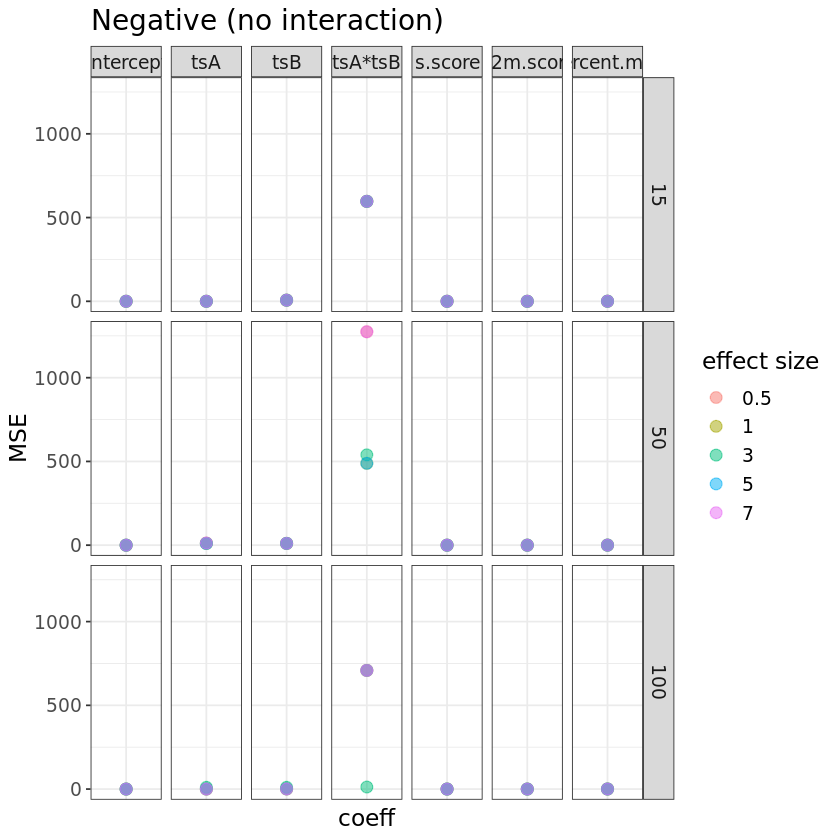

In [223]:
mse.plotdf$coeff <- factor(mse.plotdf$coeff, levels = c("(Intercept)",
                                                        "tsA",
                                                        "tsB",
                                                        "tsA*tsB",
                                                        "s.score",
                                                        "g2m.score",
                                                        "percent.mito"))

neg.mse.p <- ggplot(mse.plotdf, aes(x = coeff, y = MSE, color = as.factor(effect.sizes))) + 
                geom_point(alpha=0.5, size = 3) + 
                facet_grid(vars(lambda), vars(coeff),scales = "free_x") + 
            guides(color=guide_legend(title="effect size")) + 
            theme_bw() + theme(text = element_text(size=14), 
                               axis.text.x = element_blank(), 
                               axis.ticks.x = element_blank()) + ggtitle("Negative (no interaction)")

neg.mse.p

In [224]:
pdf("../neg_mse_test.pdf", width = 10, height = 6)
print(neg.mse.p)
dev.off()

png("../neg_mse_test.png", res = 300, units = "in", width = 10, height = 6)
print(neg.mse.p)
dev.off()

png 
  2

png 
  2

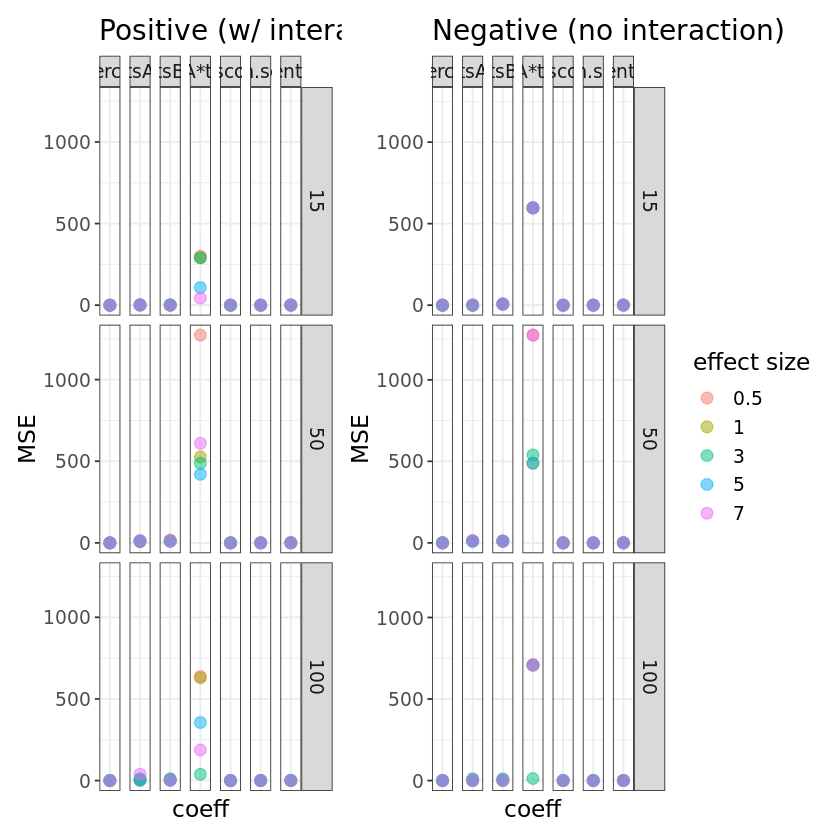

In [229]:
pos.mse.p + theme(legend.position = "none") | neg.mse.p

In [230]:
pdf("/iblm/netapp/data1/jezhou/crisprQTL/power_analysis/mse.pdf", width = 20, height = 6)
print(pos.mse.p + theme(legend.position = "none") | neg.mse.p)
dev.off()

png("/iblm/netapp/data1/jezhou/crisprQTL/power_analysis/mse.png", res = 300, units = "in", width =20, height = 6)
print(pos.mse.p + theme(legend.position = "none") | neg.mse.p)
dev.off()

png 
  2

png 
  2

# Plot coeffs

In [ ]:
coeffs_scatter <- function(alt.coeffs, title) {
    # rename coeffs for plot
    coeff.names <- c("(Intercept)" = expression(beta[0]),
          "guide.eff" = expression(beta[1]),
          "s.score" = expression(beta[2]),
         "g2m.score" = expression(beta[3]),
         "percent.mito" = expression(beta[4]))
    
    p <- alt.coeffs %>%
            mutate(across(term, factor, levels=c("(Intercept)","guide.eff","s.score","g2m.score","percent.mito"))) %>% 
            ggscatter( x = "true", y = "estimate", color = "targeting", palette = "jco", alpha = 0.5,
                      add = "reg.line",  # Add regression line
                      conf.int = TRUE) + 
            stat_cor(method = "spearman", aes(color = targeting), 
                     show.legend = FALSE, geom = "label", 
                     label.y.npc="bottom", label.x.npc = "left",
                    cor.coef.name = "rho", size = 4) + 
            facet_wrap(vars(ter, ncol = 5, 
                       labeller =  as_labeller(coeff.names), scales = "free") + 
                theme(text = element_text(size = 16),
                    plot.title = element_text(size = 16)) +
#                 theme(text = element_text(size = 18)) +
            ggtitle(title)

    return(p)
}

In [186]:
coeffs.dfs.list <- list()
for (i in 1:length(lambda.list)) {
    l <- lambda.list[i]
    coeffs.dfs.sublist <- list()
    for (j in 1:length(effect.sizes.list)) {
        size <- effect.sizes.list[j]
        coeffs <- pos.coeffs.list[[i]][[j]]
#         coeffs$true[coeffs$term=="tsA:tsB"] <- 0
        coeffs$effect.size <- effect.sizes.list[j]
        coeffs.dfs.sublist[[j]] <- coeffs
        
    }
    coeffs.dfs.all <- do.call(rbind, coeffs.dfs.sublist)
    coeffs.dfs.all$lambda <- l
    
    coeffs.dfs.list[[i]] <- coeffs.dfs.all
}

In [188]:
pos.coeffs.plotdf <- do.call(rbind,coeffs.dfs.list)
head(pos.coeffs.plotdf)

term,estimate,true,gene,effect.size,lambda
<chr>,<dbl>,"<dbl[,1]>",<int>,<dbl>,<dbl>
(Intercept),0.8245665,0.8368347,7278,0.5,15
tsA,-3.0825298,-2.9345785,7278,0.5,15
tsB,-3.0199819,-3.0489420,7278,0.5,15
s.score,1.6106873,1.5707699,7278,0.5,15
g2m.score,6.3692627,6.4769344,7278,0.5,15
percent.mito,3.8329399,3.0953799,7278,0.5,15
